<a href="https://colab.research.google.com/github/ISAWASHUN/deep-learning/blob/main/MLP%E3%81%AB%E3%82%88%E3%82%8BMNIST%E3%81%AE%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

In [ ]:
from matplotlib.transforms import Transform
transform = transforms.Compose([
   transforms.ToTensor() 
]) 
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
num_batches = 100

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=num_batches, shuffle=True)

In [ ]:
train_iter = iter(train_dataloader)

In [ ]:
imgs, labels = train_iter.next()

In [ ]:
imgs.size()

torch.Size([100, 1, 28, 28])

In [ ]:
labels

tensor([8, 1, 0, 5, 9, 8, 6, 9, 1, 3, 9, 4, 9, 1, 4, 1, 9, 9, 4, 5, 8, 8, 6, 3,
        3, 5, 3, 5, 0, 8, 1, 2, 2, 9, 6, 4, 3, 0, 4, 1, 6, 7, 1, 7, 0, 9, 9, 7,
        3, 4, 7, 5, 3, 8, 5, 0, 1, 4, 6, 2, 4, 2, 3, 4, 6, 9, 4, 9, 8, 9, 6, 7,
        3, 5, 9, 6, 0, 5, 9, 6, 0, 9, 4, 8, 0, 4, 7, 5, 3, 9, 9, 1, 2, 0, 9, 2,
        7, 3, 9, 7])

In [ ]:
img = imgs[0]

In [ ]:
img_permute = img.permute(1,2,0)

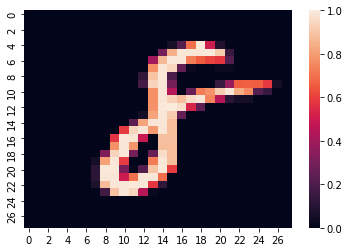

In [ ]:
sns.heatmap(img_permute.numpy()[: ,:, 0])

In [ ]:
labels[0]

tensor(8)

In [ ]:
from torch.nn.modules.activation import ReLU
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.classifier = nn.Sequential(
        nn.Linear(28 * 28 ,400),
        nn.ReLU(inplace=True),
        nn.Linear(400, 200),
        nn.ReLU(inplace=True),
        nn.Linear(200, 100),
        nn.ReLU(inplace=True),
        nn.Linear(100, 10)
    )
  def forward(self, x):
    output = self.classifier(x)
    return output

In [ ]:
model = MLP()

In [ ]:
model.to(device)

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=200, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
  running_loss = 0.0
  running_acc = 0.0
  for imgs, labels in train_dataloader:
    imgs = imgs.view(num_batches, -1)
    imgs = imgs.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    output = model(imgs)
    loss = criterion(output, labels)
    running_loss += loss.item()
    pred = torch.argmax(output, dim=1)
    running_acc += torch.mean(pred.eq(labels).float())
    loss.backward()
    optimizer.step()
  running_loss /= len(train_dataloader)
  running_acc /= len(train_dataloader)
  losses.append(running_loss)
  accs.append(running_acc)
  print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))

epoch: 0, loss: 0.7669568679233392, acc: 0.7968175411224365
epoch: 1, loss: 0.28240547761321066, acc: 0.9186182618141174
epoch: 2, loss: 0.22232795547693968, acc: 0.9357011914253235
epoch: 3, loss: 0.18362927554175257, acc: 0.9463171362876892
epoch: 4, loss: 0.15633848454803229, acc: 0.9540002942085266
epoch: 5, loss: 0.13533055875139932, acc: 0.9600839614868164
epoch: 6, loss: 0.11825553363809983, acc: 0.9656000733375549
epoch: 7, loss: 0.10463198008947075, acc: 0.9690667986869812
epoch: 8, loss: 0.0930813554674387, acc: 0.9728496670722961
epoch: 9, loss: 0.08289207897304247, acc: 0.9756996631622314
epoch: 10, loss: 0.07437828581935416, acc: 0.9782652258872986
epoch: 11, loss: 0.06675410395643364, acc: 0.980065643787384
epoch: 12, loss: 0.0590154110492828, acc: 0.9828155636787415
epoch: 13, loss: 0.053789775793751084, acc: 0.9843818545341492
epoch: 14, loss: 0.04857875278530022, acc: 0.9858484268188477


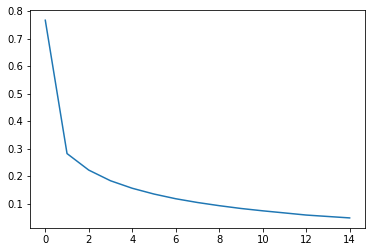

In [ ]:
plt.plot(losses)

In [ ]:
train_iter = iter(train_dataloader)

In [ ]:
imgs, labels = train_iter.next()

In [ ]:
labels

tensor([2, 7, 5, 7, 8, 1, 4, 4, 0, 9, 3, 3, 7, 3, 4, 9, 0, 8, 9, 8, 4, 8, 4, 8,
        5, 7, 7, 8, 1, 8, 7, 1, 0, 7, 0, 4, 6, 6, 7, 8, 0, 6, 5, 0, 0, 1, 3, 9,
        1, 1, 2, 3, 3, 7, 9, 5, 0, 9, 6, 5, 2, 3, 7, 9, 4, 4, 1, 6, 0, 8, 0, 4,
        6, 1, 8, 6, 1, 7, 2, 7, 0, 9, 1, 9, 2, 2, 9, 7, 1, 6, 1, 7, 9, 9, 5, 6,
        8, 5, 2, 6])

In [ ]:
imgs_gpu = imgs.view(100, -1).to(device)
output = model(imgs_gpu)

In [ ]:
pred = torch.argmax(output, dim=1)

In [ ]:
pred

tensor([2, 7, 5, 7, 8, 1, 4, 4, 0, 9, 3, 3, 7, 3, 4, 9, 0, 8, 9, 8, 4, 8, 4, 8,
        5, 7, 7, 8, 1, 8, 7, 1, 0, 7, 0, 4, 6, 6, 7, 8, 0, 6, 5, 0, 0, 1, 3, 9,
        1, 1, 2, 3, 3, 7, 9, 5, 0, 9, 6, 5, 2, 3, 7, 9, 4, 4, 1, 1, 0, 8, 0, 4,
        6, 1, 8, 6, 1, 7, 2, 7, 0, 8, 1, 9, 2, 2, 9, 7, 1, 6, 1, 7, 9, 9, 5, 6,
        8, 5, 2, 6], device='cuda:0')

In [ ]:
!ls

data  sample_data


In [ ]:
params = model.state_dict()

In [ ]:
torch.save(params, "model.prm")

In [ ]:
!ls

data  model.prm  sample_data


In [ ]:
param_load = torch.load("model.prm")

In [ ]:
model.load_state_dict(param_load)

<All keys matched successfully>